## kleine Analyse Cottbus

Die reinen Überholdaten können selbstständig von der Webseite ( https://obs.adfc-brandenburg.de/export  ) heruntergeladen werden:
- boundingbox mit Rechtsklick für Cottbus anlegen
- dann auf "Export" mit Rechtsklick und "Ziel speichern unter", abschließend das Dateiformat von ".json" zu ".geojson" ändern


<img src="img/image_cottbus.png">

In [1]:
import geopandas as gpd
import pandas as pd

In [10]:
gdf = gpd.read_file("events_cottbus.geojson")

In [11]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry
0,1.11,1.07,1,129996509.0,3.214732,3.166667,2022-08-01 09:55:27+00:00,POINT (14.32519 51.76747)
1,0.57,NaN,1,129996509.0,3.094854,3.888889,2022-08-01 09:55:33+00:00,POINT (14.32486 51.76751)
2,1.52,NaN,-1,178071536.0,4.937031,4.055556,2022-08-01 05:01:19+00:00,POINT (14.34969 51.78562)
3,1.47,1.32,-1,178071536.0,4.942762,4.055556,2022-08-01 05:01:21+00:00,POINT (14.34972 51.78555)
4,1.31,2.13,-1,178071536.0,4.955488,3.944444,2022-08-01 05:01:42+00:00,POINT (14.35005 51.78478)
...,...,...,...,...,...,...,...,...
1813,1.74,NaN,-1,225233695.0,1.170206,6.388889,2022-09-16 10:27:40+00:00,POINT (14.33646 51.76810)
1814,1.56,NaN,-1,128366375.0,0.412203,6.027778,2022-09-16 10:28:01+00:00,POINT (14.33779 51.76883)
1815,0.87,NaN,-1,128366375.0,0.208699,6.194444,2022-09-16 10:28:34+00:00,POINT (14.34058 51.76942)
1816,1.53,NaN,-1,128366375.0,0.235097,6.250000,2022-09-16 10:28:46+00:00,POINT (14.34164 51.76954)


In [48]:
gdf.to_csv('events_cottbus.csv', index=False, sep=';', decimal=',')

PermissionError: [Errno 13] Permission denied: 'events_cottbus.csv'

<AxesSubplot:>

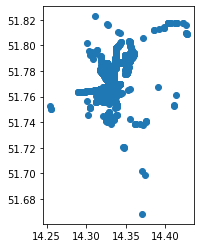

In [37]:
gdf.plot()

Text(0.5, 1.0, 'OBS Cottbus Überholabstände')

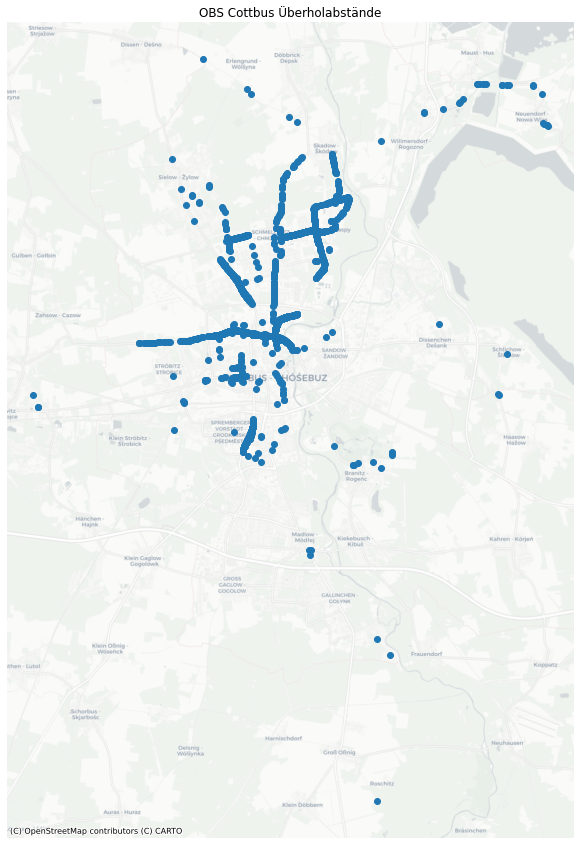

In [42]:
import contextily as ctx

gdf_plot=gdf.to_crs('EPSG:3857')
fin_plot=gdf_plot.plot(figsize=(15,15))
                        
ctx.add_basemap(fin_plot, source=ctx.providers.CartoDB.Positron)


#remove axis
fin_plot.set_axis_off()

#add title
fin_plot.set_title('OBS Cottbus Überholabstände')


array([[<AxesSubplot:title={'center':'distance_overtaker'}>]],
      dtype=object)

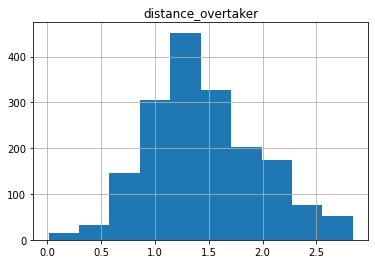

In [13]:
gdf.hist('distance_overtaker')

array([[<AxesSubplot:title={'center':'distance_overtaker'}>]],
      dtype=object)

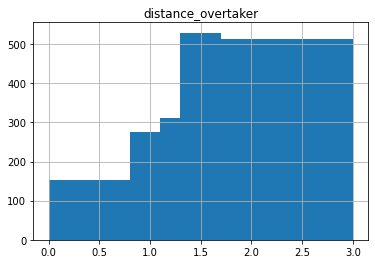

In [21]:
gdf.hist('distance_overtaker', bins=[0,
                                     0.8, 
                                     1.1,
                                     1.3,
                                     1.7,
                                    3])

In [44]:
custom_bins=pd.cut(gdf.distance_overtaker, bins=[0,
                                     0.8, 
                                     1.1,
                                     1.3,
                                     1.7,
                                    3]).reset_index().groupby('distance_overtaker').count().reset_index()
custom_bins

,distance_overtaker,index
0,"(0.0, 0.8]",158
1,"(0.8, 1.1]",281
2,"(1.1, 1.3]",316
3,"(1.3, 1.7]",521
4,"(1.7, 3.0]",506


<AxesSubplot:xlabel='distance_overtaker'>

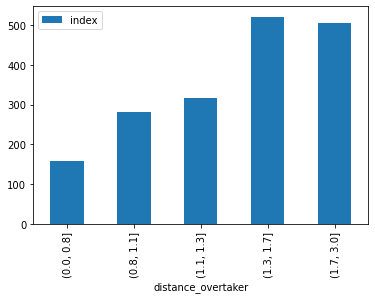

In [45]:
custom_bins.plot(kind='bar', x='distance_overtaker',y='index')

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

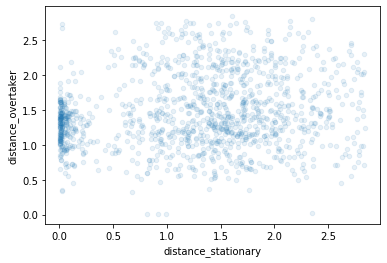

In [15]:
#plausi-check
# offenbar häufig extrem geringe Abstände nach rechts (stationary)
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1)